## Car Insurance Claims Classification

### 1. Problem Statement
- To improve from baseline prediction model(logistic regression) by tuning hyper-parameter, on whether a car insurance claim was made with given features.

### 2. Data
- Data obtained from: https://www.kaggle.com/sagnik1511/car-insurance-data
- A company has shared its annual car insurance data. We will be able to use this data to predict claims behaviour based on this dataset.
- 19 Columns X 10000 rows of data.
- The columns resemble practical real world features.
- The outcome column indicates 1 if a customer has claimed his/her loan else 0.
- The data has 18 features and 1 target column.

### 3. Standard Libraries Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### 4. Dataset Import

In [2]:
df = pd.read_csv('Car_Insurance_Claim.csv')
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1,after 2015,0,1,10238,12000.0,sedan,0,0,0,0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0,before 2015,0,0,10238,16000.0,sedan,0,0,0,1
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1,before 2015,0,0,10238,11000.0,sedan,0,0,0,0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1,before 2015,0,1,32765,11000.0,sedan,0,0,0,0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1,before 2015,0,0,32765,12000.0,sedan,2,0,1,1


### 5. Exploratory Data Analysis

#### 5.1 Dataset overview

In [3]:
#Overview of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  int64  
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  int64  
 11  CHILDREN             10000 non-null  int64  
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [4]:
#Some statistics of the dataset
df.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


In [5]:
#check number of nulls in dataset
df.isnull().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

0    6867
1    3133
Name: OUTCOME, dtype: int64

<AxesSubplot:xlabel='OUTCOME', ylabel='count'>

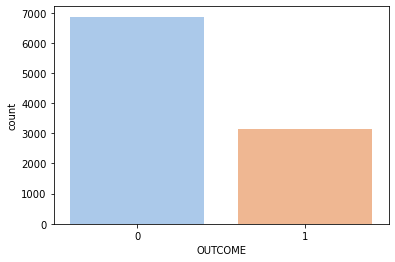

In [6]:
#check number number of claims vs number of non-claims
df.OUTCOME.value_counts()
sns.countplot(x ='OUTCOME', data = df, palette = 'pastel')

In [28]:
no_claim = len(df[df.OUTCOME == 1])
claimed = len(df[df.OUTCOME == 0])
f'Percentage of people who claimed: {round((no_claim/len(df)*100),2)}%'
f'Percentage of people who did not make claim: {round((claimed/len(df)*100),2)}%'

'Percentage of people who claimed: 31.33%'

'Percentage of people who did not make claim: 68.67%'

#### 5.2 Plots to analyse dataset

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ID,1.000000,0.001704,0.009197,0.014826,0.001233,0.006038,-0.002217,0.008156,0.009268,0.001831,-0.010506
CREDIT_SCORE,0.001704,1.000000,0.312037,0.281238,0.220658,0.009040,-0.174453,0.204542,0.127366,0.180978,-0.325286
VEHICLE_OWNERSHIP,0.009197,0.312037,1.000000,0.175626,0.125990,-0.004866,-0.097433,0.133868,0.086567,0.119521,-0.378921
MARRIED,0.014826,0.281238,0.175626,1.000000,0.287009,0.012045,-0.462193,0.218855,0.120840,0.215269,-0.262104
CHILDREN,0.001233,0.220658,0.125990,0.287009,1.000000,0.020911,-0.447655,0.220415,0.115354,0.206295,-0.232835
POSTAL_CODE,0.006038,0.009040,-0.004866,0.012045,0.020911,1.000000,-0.133978,0.113686,0.038492,-0.116985,0.095889
ANNUAL_MILEAGE,-0.002217,-0.174453,-0.097433,-0.462193,-0.447655,-0.133978,1.000000,-0.323547,-0.116598,-0.195217,0.187154
SPEEDING_VIOLATIONS,0.008156,0.204542,0.133868,0.218855,0.220415,0.113686,-0.323547,1.000000,0.359838,0.443074,-0.291862
DUIS,0.009268,0.127366,0.086567,0.120840,0.115354,0.038492,-0.116598,0.359838,1.000000,0.259359,-0.189352
PAST_ACCIDENTS,0.001831,0.180978,0.119521,0.215269,0.206295,-0.116985,-0.195217,0.443074,0.259359,1.000000,-0.311495


<Figure size 864x648 with 0 Axes>

<AxesSubplot:>

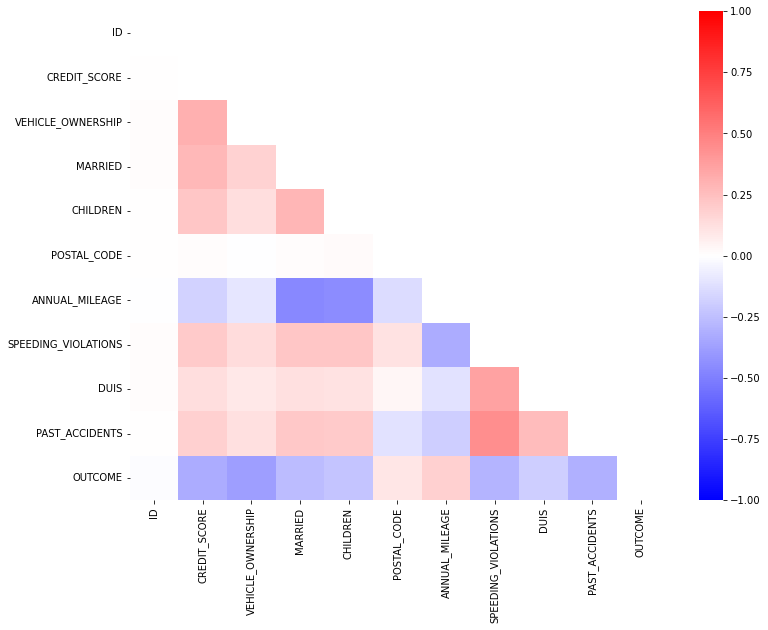

In [8]:
#correlation and correlation heatmap
df.corr()

mask = np.triu(np.ones_like(df.corr()))
plt.figure(figsize=(12, 9))
sns.heatmap(df.corr(),cmap='bwr', vmin=-1, vmax=1, mask=mask,)

- The above plot shows the correlation amount the features. We can see that there is no Multicollinearity present.
- There is also (almost) no correlation between features(ID and POSTAL_CODE) with the target. It is pretty common sense why. So we can remove these features as part of out data cleaning.

<Figure size 1152x576 with 0 Axes>

Text(0.5, 1.0, 'Driving Experience vs Outcome')

<AxesSubplot:title={'center':'Driving Experience vs Outcome'}, xlabel='DRIVING_EXPERIENCE', ylabel='count'>

Text(0.5, 0, 'Driving experience in years')

Text(0, 0.5, 'Frequency')

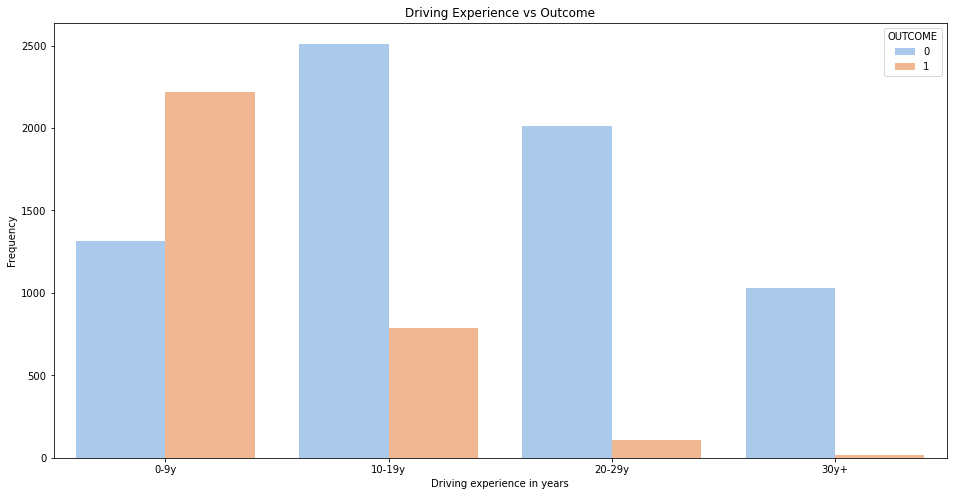

In [9]:
#Driving experience vs Outcome

plt.figure(figsize=(16,8))
plt.title('Driving Experience vs Outcome')
sns.countplot(data=df, x ='DRIVING_EXPERIENCE', hue='OUTCOME', palette = 'pastel')
plt.xlabel('Driving experience in years')
plt.ylabel('Frequency')

- Data seems to suggest that people with less years of driving experience, are more likely to claim

<Figure size 1152x576 with 0 Axes>

Text(0.5, 1.0, 'Age vs Outcome')

<AxesSubplot:title={'center':'Age vs Outcome'}, xlabel='AGE', ylabel='count'>

Text(0.5, 0, 'Age Group')

Text(0, 0.5, 'Frequency')

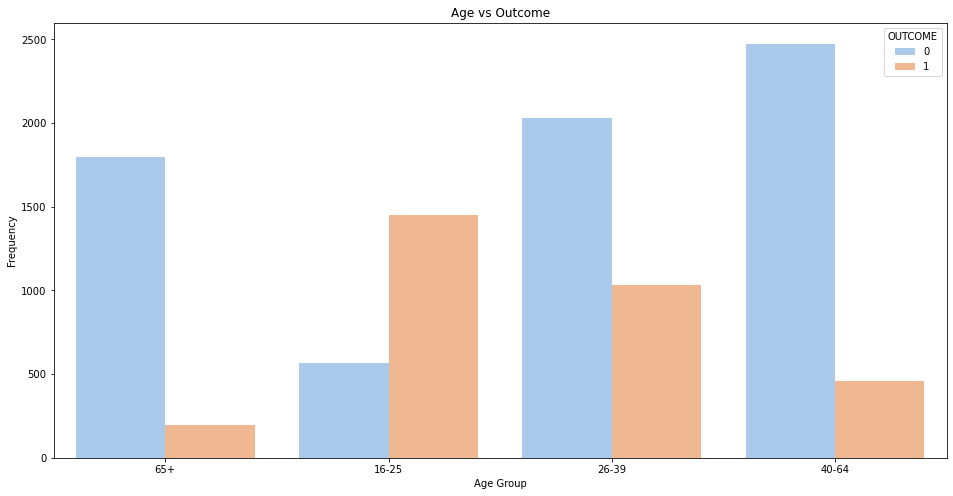

In [10]:
#Age vs Outcome

plt.figure(figsize=(16,8))
plt.title('Age vs Outcome')
sns.countplot(data=df, x ='AGE', hue='OUTCOME', palette = 'pastel')
plt.xlabel('Age Group')
plt.ylabel('Frequency')

- Data seems to suggest that people of younger age, are more likely to claim

<Figure size 1152x576 with 0 Axes>

Text(0.5, 1.0, 'Gender vs Outcome')

<AxesSubplot:title={'center':'Gender vs Outcome'}, xlabel='GENDER', ylabel='count'>

Text(0.5, 0, 'Gender')

Text(0, 0.5, 'Frequency')

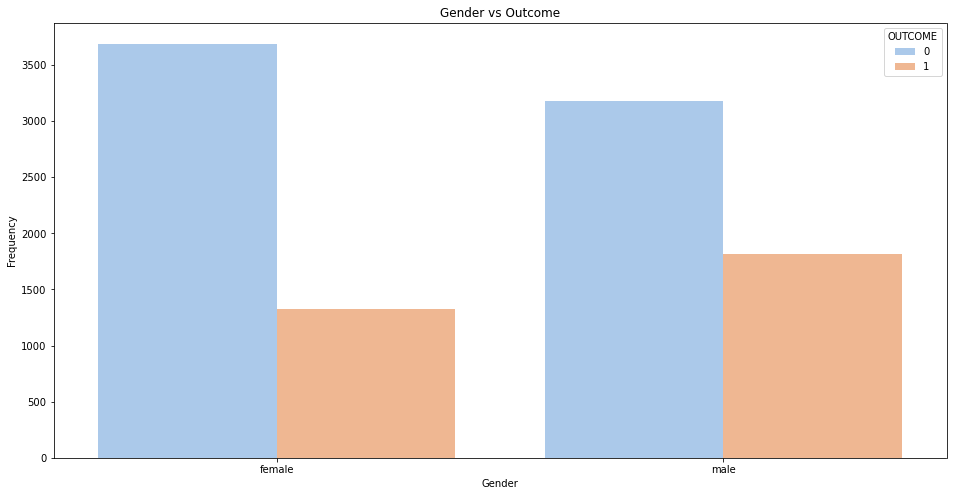

In [11]:
#Gender vs Outcome

plt.figure(figsize=(16,8))
plt.title('Gender vs Outcome')
sns.countplot(data=df, x ='GENDER', hue='OUTCOME', palette = 'pastel')
plt.xlabel('Gender')
plt.ylabel('Frequency')

- Data seems to suggest that males are more likely to make claims.

### 6. Data cleaning

#### 6.1 Dropping features that's not required

In [12]:
#Drop ID and POSTAL_CODE columns as there is (almost) no correlation between features(ID and POSTAL_CODE) with the target.

df = df.drop(['ID','POSTAL_CODE'], axis = 1)
df

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,majority,0-9y,high school,upper class,0.629027,1,after 2015,0,1,12000.0,sedan,0,0,0,0
1,16-25,male,majority,0-9y,none,poverty,0.357757,0,before 2015,0,0,16000.0,sedan,0,0,0,1
2,16-25,female,majority,0-9y,high school,working class,0.493146,1,before 2015,0,0,11000.0,sedan,0,0,0,0
3,16-25,male,majority,0-9y,university,working class,0.206013,1,before 2015,0,1,11000.0,sedan,0,0,0,0
4,26-39,male,majority,10-19y,none,working class,0.388366,1,before 2015,0,0,12000.0,sedan,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,26-39,female,majority,10-19y,university,upper class,0.582787,1,before 2015,0,0,16000.0,sedan,0,0,1,0
9996,26-39,female,majority,10-19y,none,middle class,0.522231,1,after 2015,0,1,NaN,sedan,1,0,0,0
9997,26-39,male,majority,0-9y,high school,middle class,0.470940,1,before 2015,0,1,14000.0,sedan,0,0,0,0
9998,26-39,female,majority,10-19y,high school,poverty,0.364185,0,before 2015,0,1,13000.0,sedan,2,0,1,1


#### 6.2 Fill NULLS

In [13]:
# Check for nulls
df.isnull().sum()

AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [14]:
# Fill in missing data as there are null values in CREDIT_SCORE and ANNUAL_MILEAGE columns.
# Will in with the mean value of each column respectively, using SKlearn’s SimpleImputer.

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df[['CREDIT_SCORE','ANNUAL_MILEAGE']] = imputer.fit_transform(df[['CREDIT_SCORE','ANNUAL_MILEAGE']])
df.isnull().sum()



AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

In [15]:
df

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,majority,0-9y,high school,upper class,0.629027,1,after 2015,0,1,12000.000000,sedan,0,0,0,0
1,16-25,male,majority,0-9y,none,poverty,0.357757,0,before 2015,0,0,16000.000000,sedan,0,0,0,1
2,16-25,female,majority,0-9y,high school,working class,0.493146,1,before 2015,0,0,11000.000000,sedan,0,0,0,0
3,16-25,male,majority,0-9y,university,working class,0.206013,1,before 2015,0,1,11000.000000,sedan,0,0,0,0
4,26-39,male,majority,10-19y,none,working class,0.388366,1,before 2015,0,0,12000.000000,sedan,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,26-39,female,majority,10-19y,university,upper class,0.582787,1,before 2015,0,0,16000.000000,sedan,0,0,1,0
9996,26-39,female,majority,10-19y,none,middle class,0.522231,1,after 2015,0,1,11697.003207,sedan,1,0,0,0
9997,26-39,male,majority,0-9y,high school,middle class,0.470940,1,before 2015,0,1,14000.000000,sedan,0,0,0,0
9998,26-39,female,majority,10-19y,high school,poverty,0.364185,0,before 2015,0,1,13000.000000,sedan,2,0,1,1


- There are no more NULL values in the dataset

#### 6.3 Converting categorial features via One-Hot Encoding so that all features can work on KNN, Logistic Regression and Decision Tree models

In [16]:
df = pd.get_dummies(df, columns = ['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME','VEHICLE_YEAR', 'VEHICLE_TYPE'])
df.head()

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,AGE_16-25,...,EDUCATION_none,EDUCATION_university,INCOME_middle class,INCOME_poverty,INCOME_upper class,INCOME_working class,VEHICLE_YEAR_after 2015,VEHICLE_YEAR_before 2015,VEHICLE_TYPE_sedan,VEHICLE_TYPE_sports car
0,0.629027,1,0,1,12000.0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
1,0.357757,0,0,0,16000.0,0,0,0,1,1,...,1,0,0,1,0,0,0,1,1,0
2,0.493146,1,0,0,11000.0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0
3,0.206013,1,0,1,11000.0,0,0,0,0,1,...,0,1,0,0,0,1,0,1,1,0
4,0.388366,1,0,0,12000.0,2,0,1,1,0,...,1,0,0,0,0,1,0,1,1,0


### 7. Modeling
- Since outcome is boolean(1 or 0), we will use classification models, namely KNN, Logistic Regression and Decision Tree models

In [17]:
# Split out features as X and target as y
X = df.drop(['OUTCOME'], axis=1)
y = df['OUTCOME']

In [18]:
# Splitting data into training and test set:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [19]:
#Perform feature scaling. fit_transform for train feature data and only transform for test feature data
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [20]:
# Check if dataset is inbalanced
no_claim = len(df[df.OUTCOME == 1])
claimed = len(df[df.OUTCOME == 0])
f'Percentage of people who did not claim: {round((no_claim/len(df)*100),2)}%'
f'Percentage of people who claimed: {round((claimed/len(df)*100),2)}%'


'Percentage of people who did not claim: 31.33%'

'Percentage of people who claimed: 68.67%'

In [21]:
# Since classification is not in-balanced, to perform over-sampling on in-balanced data

from imblearn.over_sampling import SMOTE
from collections import Counter

oversample = SMOTE(random_state=33)
X_train, y_train = oversample.fit_resample(X_train, y_train)

counter = Counter(y_train)
print(counter)

#Training Data is now balanced

Counter({0: 5486, 1: 5486})


In [22]:
#choose a model
# do a baseline accuracy score first.
#then run hyper parameter tuning, to do clf.fit and output the accuracy score - accuracy score should improve
# show ROC and confusion matrix

#### 7.2 Baseline Logistic Regression Model
- We will run an accuacy score using the baseline logistic regression model first

In [23]:
#Import libraries required to perfrom logistic regression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [24]:
#Perform Logister regression baseline

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))

DecisionTreeClassifier()

Accuracy:  0.7775


#### Baseline logistic regression accuracy is 77.75%

#### 7.3 Logistic Regression Model with tuning of hyper parameters
- We will tune some hyperparameters (using Gridsearch) in attempt to enhance accuracy of running the prediction using Logistic Regression model again

In [25]:
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier()

# Create the parameters list we wish to tune.
parameters = {'max_depth':[1, 2, 3, 4, 5, 6],
              'min_samples_leaf':[2, 3, 4], 
              'min_samples_split':[10, 20, 30]}

# Perform grid search on the classifier using 'accuracy' as the scoring method.
# Create the object.
grid_obj = GridSearchCV(clf, parameters, scoring='accuracy', cv=5,n_jobs=-1) # n_jobs refer to the processor, -1 means all processor

# Fit the grid search object to the training data and find the optimal parameters.
# Fit the data
grid_fit = grid_obj.fit(X_train, y_train)

# View results of GridSearchCV in DataFrame
pd.concat([pd.DataFrame(grid_fit.cv_results_["params"]),   
           pd.DataFrame(grid_fit.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1).head()

# Get the estimator.
best_clf = grid_fit.best_estimator_

# Fit the new model.
best_clf.fit(X_train, y_train)


# Make predictions using the new model.
best_test_predictions = best_clf.predict(X_test)

accuracy_score(y_test,best_test_predictions)

,max_depth,min_samples_leaf,min_samples_split,Accuracy
0,1,2,10,0.76276
1,1,2,20,0.76276
2,1,2,30,0.76276
3,1,3,10,0.76276
4,1,3,20,0.76276


DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, min_samples_split=10)

0.84

#### Tuning the hyper-parameters improved accuracy of model from 77.75% to 84%

array([1., 1., 0., ..., 0., 0., 0.])

AUC score:  0.7574613465225615


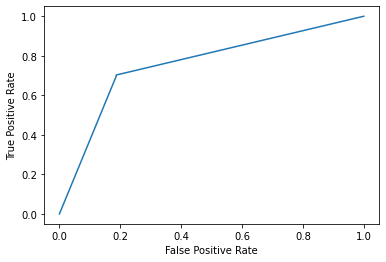

In [26]:
#Plot ROC Curve

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay

y_score = dt.predict_proba(X_test)[:,1] #returns probabilities of a classification label
y_score


fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=dt.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()


# True values come before predicted values in parameter order 
print('AUC score: ',roc_auc_score(y_test,dt.predict_proba(X_test)[:,1])) 

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      1381
           1       0.73      0.77      0.75       619

    accuracy                           0.84      2000
   macro avg       0.81      0.82      0.82      2000
weighted avg       0.84      0.84      0.84      2000

Accuracy Score:  0.84


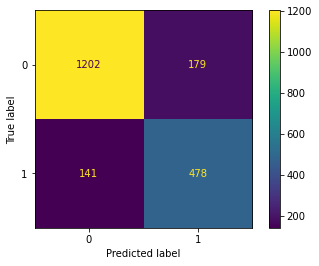

In [27]:
#Confusion Matrix

from sklearn.metrics import  confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report

cm = confusion_matrix(y_test, best_test_predictions)

print(classification_report(y_test, best_test_predictions))
print('Accuracy Score: ',accuracy_score(y_test, best_test_predictions))

cm_display = ConfusionMatrixDisplay(cm).plot() # visualize

#### From the accuracy score, AUC score, precision score, and recall score and that the ROC Curve hugs left, we can conclude that the model fits our dataset well.